In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [23]:
# CSV uploaden
df = pd.read_csv("../K2_MEN_DATASET.csv", error_bad_lines=False, sep=",")

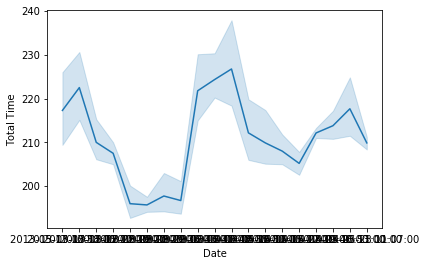

In [24]:
TimesInAFinal = df[(df["Competition Round_HEAT"])]
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="Total Time")

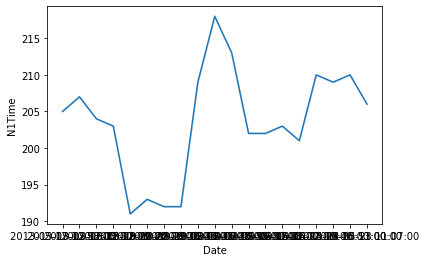

In [25]:
TimesInAFinal = df[(df["Competition Round_HEAT"])]
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="N1Time")

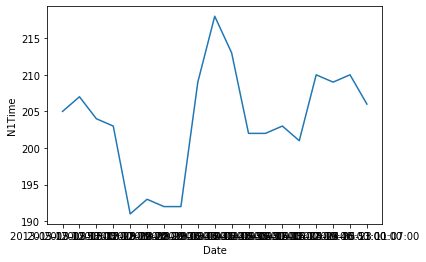

In [26]:
TimesInAFinal = df[(df["Competition Round_HEAT"])].drop_duplicates(["Date"])
ax = sns.lineplot(data=TimesInAFinal,x="Date",y="N1Time")

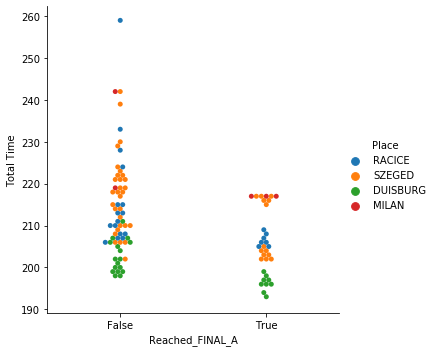

In [27]:
semifinalTimes = df[(df["Competition Round_SEMIFINAL"] == True)]
ax = sns.catplot(data=semifinalTimes,x="Reached_FINAL_A",y = "Total Time",hue="Place",kind="swarm")

/Users/BramSikkens/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/BramSikkens/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


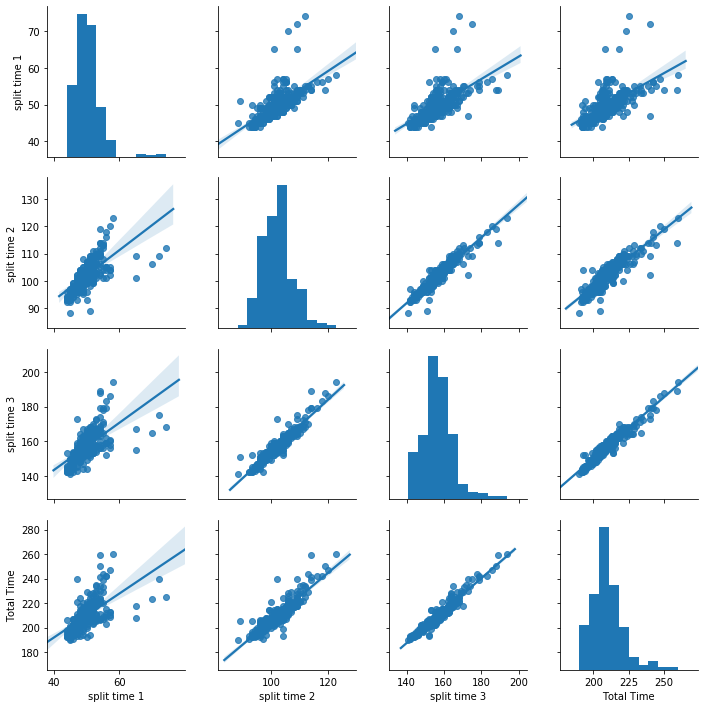

In [28]:
ax = sns.pairplot(data=df,vars=["split time 1", "split time 2", "split time 3", "Total Time"], kind="reg")


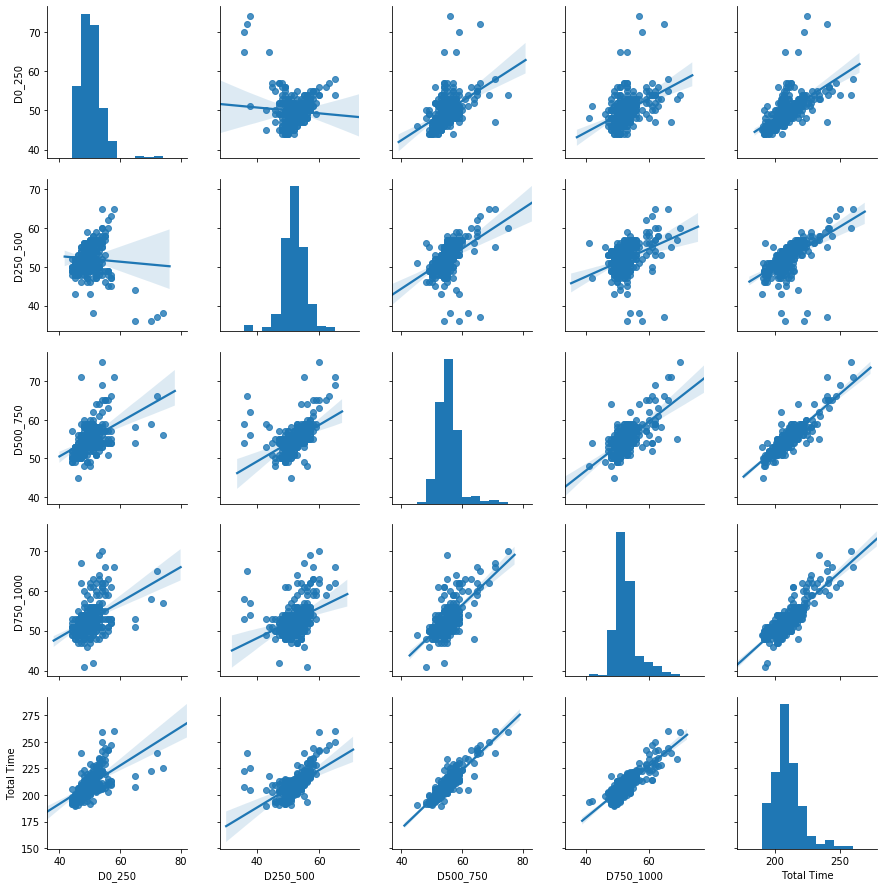

In [29]:
ax = sns.pairplot(data=df,vars=["D0_250", "D250_500", "D500_750","D750_1000","Total Time"], kind="reg")

[(185, 240)]

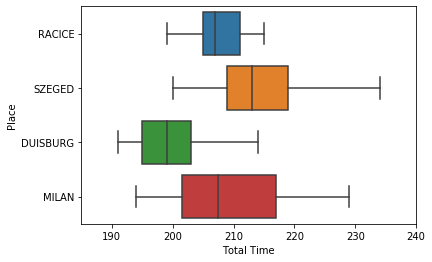

In [30]:
%matplotlib inline
ax = sns.boxplot(x=df["Total Time"],y=df["Place"],showfliers=False)
ax.set(xlim=(185, 240))

[(40, 65)]

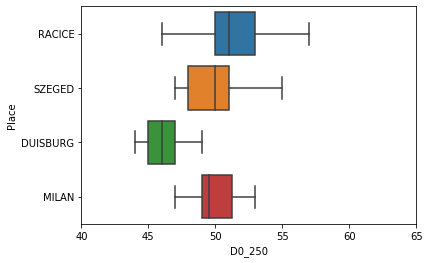

In [31]:
ax = sns.boxplot(x=df["D0_250"],y=df["Place"],showfliers=False)
ax.set(xlim=(40, 65))


[(40, 65)]

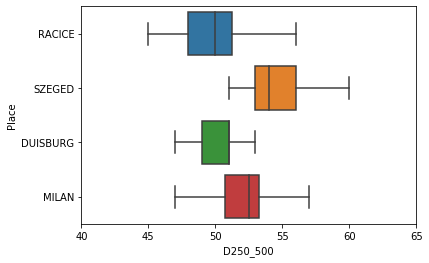

In [32]:
bx = sns.boxplot(x=df["D250_500"],y=df["Place"],showfliers=False)
bx.set(xlim=(40, 65))

[(40, 65)]

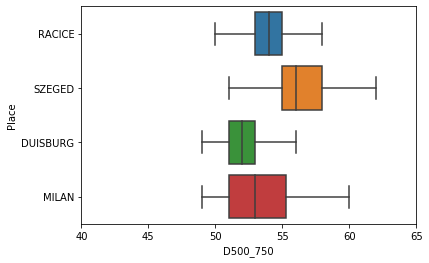

In [33]:
cx = sns.boxplot(x=df["D500_750"],y=df["Place"],showfliers=False)
cx.set(xlim=(40, 65))

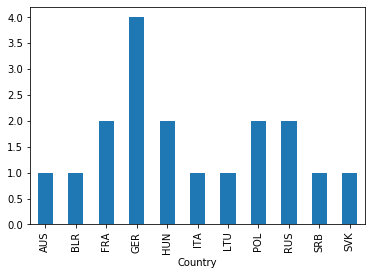

In [34]:
CountriesInAFinal = df[(df["Competition Round_FINAL A"] == True) & (df["Final Rank"] <4)]
groupedCountries = CountriesInAFinal.groupby("Country").size()
groupedCountries.plot.bar()

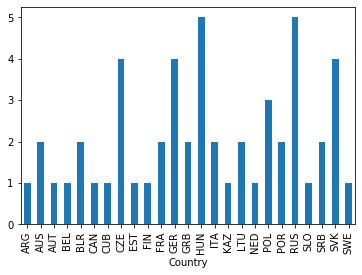

In [35]:
CountriesInAFinal = df[(df["Competition Round_FINAL A"] == True)]
groupedCountries = CountriesInAFinal.groupby("Country").size()
groupedCountries.plot.bar()

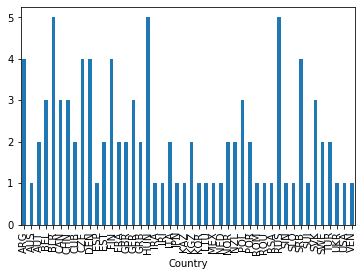

In [36]:
CountriesInBFinal = df[(df["Competition Round_SEMIFINAL"] == True)]
groupedCountries = CountriesInBFinal.groupby("Country").size()
groupedCountries.plot.bar()

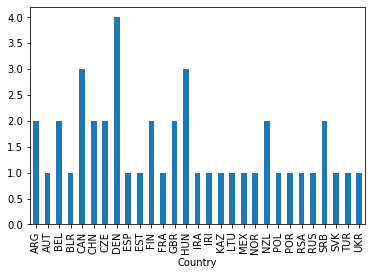

In [37]:
CountriesInBFinal = df[(df["Competition Round_FINAL B"] == True)]
groupedCountries = CountriesInBFinal.groupby("Country").size()
groupedCountries.plot.bar()

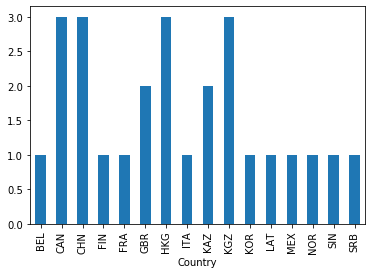

In [38]:
StrandedCountries = df[(df["Competition Round_FINAL C"] == False) & (df["Competition Round_SEMIFINAL"] == False)& (df["Competition Round_FINAL B"] == False) & (df["Competition Round_FINAL A"] == False) & (df["Reached_FINAL_A"]  == False ) & (df["Reached_SEMI"]  == False )]
groupedCountries = StrandedCountries.groupby("Country").size()
groupedCountries.plot.bar()

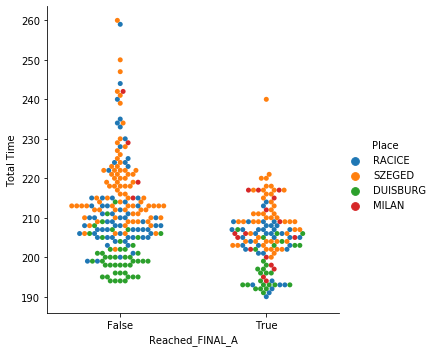

In [39]:
sns.catplot(x="Reached_FINAL_A", y="Total Time", hue="Place" ,kind="swarm", data=df)

In [43]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="K2_pandas_profiling.html")

NameError: name 'ProfileReport' is not defined

In [0]:
data = df[(df["Competition Round_HEAT"] == True) & df["Reached_FINAL_A"] == True]
groups = data.groupby("Final Rank").size()
groups.plot.bar()

In [0]:
onlyTop3 = df[(df["Final Rank"] < 4)]
groups = onlyTop3.groupby("Date")["Total Time"].mean().to_frame(name="Top3Avg").reset_index()
print(groups)
merge = pd.merge(df,groups,on="Date",how="outer",)
print(merge.head(50))